In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\covid_toy.csv")
df["fever"].fillna(df["fever"].mean(),inplace=True)
l = LabelEncoder()
df["gender"] = l.fit_transform(df["gender"])
df["cough"] = l.fit_transform(df["cough"])
df["city"] = l.fit_transform(df["city"])
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9512\2366381657.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["fever"].fillna(df["fever"].mean(),inplace=True)


,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,No
1,27,1,100.0,0,1,Yes
2,42,1,101.0,0,1,No
3,31,0,98.0,0,2,No
4,65,0,101.0,0,3,No


In [2]:
X = df.drop("has_covid",axis=1)
y = df["has_covid"]
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.3,random_state=10)

In [3]:
#applying random forest
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=20
)

rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.5666666666666667


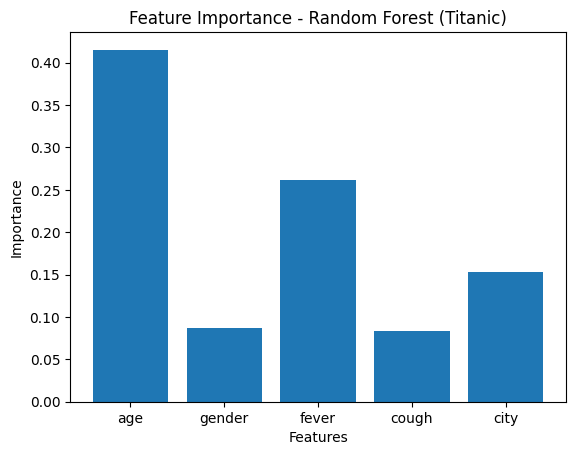

In [4]:
import matplotlib.pyplot as plt
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.figure()
plt.bar(X.columns, rf.feature_importances_)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - Random Forest (Titanic)")
plt.show()

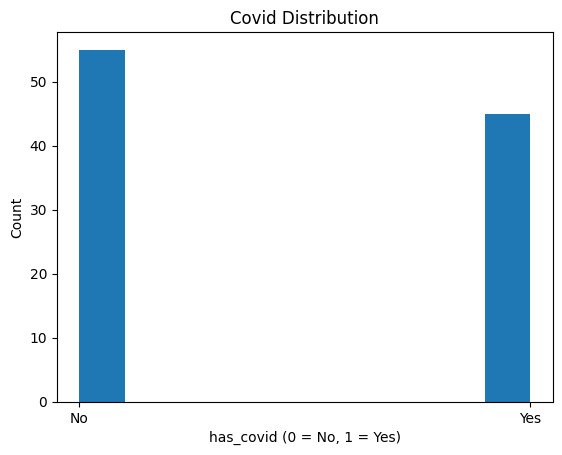

In [5]:
plt.figure()
plt.hist(df["has_covid"])
plt.xlabel("has_covid (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Covid Distribution")
plt.show()

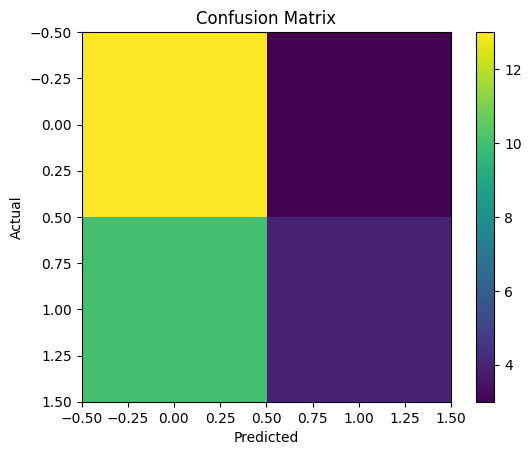

In [6]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

In [7]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,No
1,27,1,100.0,0,1,Yes
2,42,1,101.0,0,1,No
3,31,0,98.0,0,2,No
4,65,0,101.0,0,3,No


In [8]:
live = pd.DataFrame({
    'age':[60], 
    'gender':[1], 
    'fever':[103.0], 
    'cough':[0], 
    'city':[2]
})

In [9]:
probabilty = rf.predict_proba(live)
prob_pos = probabilty[0][1]
label = "Covid" if prob_pos>0.50 else "No Covid"
print(prob_pos)
print(label)

0.19
No Covid
